In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab.ipynb")

# DSC 80: Lab 04

### Due Date: Monday October 25, 11:59 PM

## Instructions
Much like in DSC 10, this Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding work will be developed in an accompanying `lab*.py` file, that will be imported into the current notebook.

Labs and programming assignments will be graded in (at most) two ways:
1. The functions and classes in the accompanying python file will be tested (a la DSC 20),
2. The notebook will be graded (for graphs and free response questions).

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for working in the Notebook**:
- The notebooks serve to present you the questions and give you a place to present your results for later review.
- The notebook on *lab assignments* are not graded (only the `.py` file).
- Notebooks for PAs will serve as a final report for the assignment, and contain conclusions and answers to open ended questions that are graded.
- The notebook serves as a nice environment for 'pre-development' and experimentation before designing your function in your `.py` file.

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are encouraged to write your own additional functions to solve the lab! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `lab.py` (much like we do in the notebook).
- Always document your code!

### Importing code from `lab.py`

* We import our `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab` merely import the existing compiled python.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lab import *

In [225]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Login time questions

Imagine that you own an online store and you'd like to monitor the visits to your site. You've collected some data that you store in login_table.csv. It contains the information about different login dates and times for different users. Some users are unique, some visited your store multiple times.

You need to answer a few questions below in order to understand the login patters of your users.

**Question 1**

Write a function `latest_login` which takes in a dataframe like `login` and outputs a dataframe, indexed by `Login Id`, of the login that occurs at the latest time-of-day for each user. Latest time-of-day is as it says: the latest time, **regardless of how recent the day is**.

For example, if a user always logs in once per day at Noon, but her most recent log in happened to be at 8:00PM, then her latest log-in time becomes 8:00PM.

Note: you do not need to import datetime. Look into how pandas has its own built in methods for dates.

In [5]:
fp = os.path.join('data', 'login_table.csv')
login = pd.read_csv(fp)

In [6]:
login

,Login Id,Time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59
...,...,...
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45


In [7]:
login_c = login.copy()
login_c['Time'] = pd.to_datetime(login_c['Time'])
out = login_c.groupby('Login Id')['Time'].max().reset_index().set_index('Login Id')
out.size

433

In [8]:
# don't change this cell -- it is needed for the tests to work
fp = os.path.join('data', 'login_table.csv')
login = pd.read_csv(fp)
q1_result = latest_login(login)

In [9]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2**

As a site owner, you would like to see how often users return to your site. You've noticed that there are users who have several logins and users who logged in only once. Of those users that logged in more than once, you are interested in finding the shortest amount of time elapsed between two consecutive logins for each of these users.

Write a function `smallest_ellapsed` which takes in a dataframe like `login` and outputs a dataframe, indexed by Login ID, containing the shortest time elapsed for each user. Any users who haven't logged in more than once should not be included in the output.

In [10]:
fp = os.path.join('data', 'login_table.csv')
login = pd.read_csv(fp)
login

,Login Id,Time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59
...,...,...
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45


In [11]:
login_c = login.copy()
login_c['Time'] = pd.to_datetime(login_c['Time'])
count = login_c.groupby('Login Id')['Time'].count().reset_index()
out = login_c.groupby('Login Id')['Time'].unique().reset_index()
out = out.drop(count[count['Time'] == 1].index, inplace = False)
out['Time'] = out['Time'].map(np.diff).map(pd.to_timedelta)
out.at[out['Time'].map(len) == 0, 'Time'] = 0
out = out.set_index('Login Id')
out = pd.DataFrame(out['Time'].map(np.min))

In [12]:
# don't change this cell -- it is needed for the tests to work
fp = os.path.join('data', 'login_table.csv')
login = pd.read_csv(fp)
q2_result = smallest_ellapsed(login)

In [13]:
grader.check("q2")

q2 results: All test cases passed!

# Pivot tables

In [14]:
fp = os.path.join('data', 'sales.csv')
df = pd.read_csv(fp)
df

,Name,Product,Date,Total
0,Smith,book,01.01.2012,200
1,Jones,pen,02.20.2013,300
2,Trump,hotel,03.03.2015,100
3,Smith,book,05.10.2013,2000
4,Jones,book,02.20.2013,30
5,Trump,boat,03.30.2017,700
6,Smith,ruler,07.05.2014,2100
7,Jones,ruler,02.25.2015,350
8,Trump,book,03.03.2015,1000
9,Smith,pen,01.01.2012,2500


In [109]:
pd.pivot_table(df, values='Total', index=['Name'], aggfunc=np.sum)

,Total
Name,
Jones,3680
Smith,6800
Trump,1950


In [112]:
pd.pivot_table(df, index=['Product', 'Name'], columns = ['Date'], aggfunc=np.count_nonzero, fill_value=0)

Total                                              \
Date          01.01.2012 02.20.2013 02.25.2015 03.03.2015 03.30.2017   
Product Name                                                           
boat    Trump          0          0          0          0          1   
book    Jones          0          1          0          0          0   
        Smith          1          0          0          0          0   
        Trump          0          0          0          1          0   
hotel   Trump          0          0          0          1          0   
pen     Jones          0          1          0          0          0   
        Smith          1          0          0          0          0   
        Trump          0          0          0          1          0   
ruler   Jones          0          1          1          0          0   
        Smith          0          0          0          0          0   

                                     
Date          05.10.2013 07.05.2014  
Product Name                         
boat    Trump          0          0  
book    Jones          0          0  
        Smith          1          0  
        Trump          0          0  
hotel   Trump          0          0  
pen     Jones          0          0  
        Smith          0          0  
        Trump          0          0  
ruler   Jones          0          0  
        Smith          0          1

**Question 3**

The pivot table allows you to group the entries of a dataframe into a two-dimensional table that provides a (multidimensional) summarization of the data. You are given a simple dataset, `sales.csv`, and are asked to solve a few simple problems using a `pivot table`.  

We have provided the outline for your pivot tables. Your values will be different.

* Write a function `total_seller` that takes `sales` dataframe and returns a pivot table that contains a total for each seller, indexed by a name.

<img src="data/imgs/image_0.png" width="15%"/>

* Write a function `product_name` that takes `sales` dataframe and returns a pivot table that contains a total for each seller, indexed by a product.

<img src="data/imgs/image_1.png" width="25%"/>

* Write a function `count_product` that takes `sales` dataframe and returns a pivot table that contains the total amount of items sold product wise, name wise per date. Replaces `NaNs` with 0s. 

<img src="data/imgs/image_2.png" width="35%"/>

* Write a function `total_by_month` that takes `sales` dataframe and returns a pivot table that contains the total amount name wise, product wise per `month`. Replaces `NaNs` with 0s.

<img src="data/imgs/image_3.png" width="40%"/>


Note: Here is a <a href = "https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html"> link </a> to a great source that provides an overview of the pivot tables with mane examples from the Titanic dataset. 

If your "Total" title is on the right side of the DataFrame instead of the left as seen above, as long as you are passing the doctests you should be fine. This is likely due to an issue with pandas versions.

In [141]:
df_c = df.copy()
df_c['Month'] = pd.to_datetime(df_c['Date']).dt.month
df_c = df_c.drop('Date', axis = 1)
out = pd.pivot_table(df_c, index=['Name', 'Product'], columns='Month',
                         aggfunc=np.count_nonzero, fill_value=0)
columns = pd.to_datetime(out['Total'].columns.values, format='%m').month_name()
out.columns = out.columns.set_levels(columns, level=1)
out

Total                        
Month         January February March May July
Name  Product                                
Jones book          0        1     0   0    0
      pen           0        1     0   0    0
      ruler         0        2     0   0    0
Smith book          1        0     0   1    0
      pen           1        0     0   0    0
      ruler         0        0     0   0    1
Trump boat          0        0     1   0    0
      book          0        0     1   0    0
      hotel         0        0     1   0    0
      pen           0        0     1   0    0

# A distribution of Skittles

[Skittles](https://en.wikipedia.org/wiki/Skittles_(confectionery)) are made in two locations in the United States: Yorkville, Illinois and Waco, Texas. In these factories, Skittles of different colors are made separately by different machines and combined/packaged into bags for sale. The tab-separated file `skittles.tsv` contains the contents of 468 bags of Skittles.

Most people have preferences for their favorite flavor and there is a surprising amount of variation among the distribution of flavors in each bag.

Look at the variation by bag in the dataset below:

In [142]:
skittles_fp = os.path.join('data', 'skittles.tsv')
skittles = pd.read_csv(skittles_fp, sep='\t')

In [143]:
# don't change this cell -- it is needed for the tests to work
fp = os.path.join('data', 'sales.csv')
df = pd.read_csv(fp)
q3_total_seller_out = total_seller(df)
q3_product_name_out = product_name(df)
q3_product_count_out = count_product(df)
q3_total_by_month_out = total_by_month(df)

In [144]:
grader.check("q3")

q3 results: All test cases passed!

### Differences between Yorkville and Waco

In [145]:
skittles

,red,orange,yellow,green,purple,Factory
0,10,15,11,7,18,Yorkville
1,5,12,17,15,10,Yorkville
2,16,11,15,11,9,Waco
3,15,8,13,16,7,Waco
4,11,14,20,8,7,Waco
...,...,...,...,...,...,...
463,11,11,12,13,11,Waco
464,17,10,8,11,12,Waco
465,9,14,12,10,15,Waco
466,12,14,11,10,10,Waco


**Question 4**

First, you will investigate if the machine that mixes together the Skittles of different colors might favor one color over another. Use a permutation test to assess whether, on average, bags made in Yorkville have the same number of orange skittles as bags made in Waco. Do this by following the outline below:
1. Create a function `diff_of_means` that takes in a dataframe of counts of skittles (like `skittles`) and their origin and returns the *absolute* difference of means between the number of orange Skittles per bag from Yorkville and Waco.
2. Create a function `simulate_null` that takes in a dataframe of counts of skittles (like `skittles`) and their origin, and returns one instance of the test-statistic under the null hypothesis.
3. Create a function `pval_orange` that takes in a dataframe of counts of skittles (like `skittles`) and their origin, and calculates the p-value for the permutation test using `1000` trials.

Plot the observed statistic, along with the histogram for the simulated distribution, to check your work.

In [357]:
col = 'yellow'
ski_c = skittles.copy()
observed_diff = ski_c.groupby('Factory')[col].mean().diff().abs().to_list()[1]
n = 1000
factory = ski_c['Factory'].values
factory[factory  == 'Yorkville'] = True
factory[factory  == 'Waco'] = False

count = ski_c[col].values
n_Y = factory.sum()
n_W = len(factory) - n_Y

permutations = np.column_stack([
    np.random.permutation(factory)
    for _ in range(n)
]).T.astype('bool')

mean_Y = (count * permutations).sum(axis=1) / n_Y
mean_W = (count * ~permutations).sum(axis=1) / n_W
differences = abs(mean_W - mean_Y)

np.count_nonzero(differences >= observed_diff) / n

0.0

(array([265., 250., 186., 101.,  90.,  55.,  34.,  12.,   5.,   2.]),
 array([0.00131965, 0.10141496, 0.20151026, 0.30160557, 0.40170088,
        0.50179619, 0.6018915 , 0.7019868 , 0.80208211, 0.90217742,
        1.00227273]),
 <BarContainer object of 10 artists>)

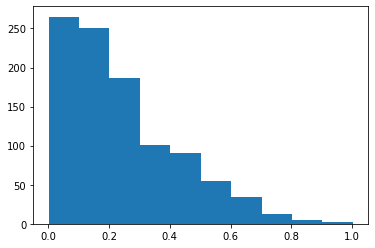

In [352]:
plt.hist(differences)

In [301]:
# don't change this cell -- it is needed for the tests to work
skittles_fp = os.path.join('data', 'skittles.tsv')
skittles = pd.read_csv(skittles_fp, sep='\\t', engine='python')
q4_diff_of_means_out = diff_of_means(skittles)
q4_simulate_null_out = simulate_null(skittles)
q4_pval_out = pval_orange(skittles)

In [302]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5**

Use your work from above to decide which colors tend to differ the most between the two locations on average. Create a function `ordered_colors` that returns your answer as an ordered list from "most different" to "least different" between the two locations. Your list should be a *hard-coded* list, where each element has the form `(color, p-value)`.

Even though there is randomness in the color composition in each bag, this list gives the likelihood that the machines have a systematic, meaningful, difference in how they blend the colors in each bag.

In [377]:
pval_orange(skittles, col = 'orange')

0.044

In [378]:
pval_orange(skittles, col = 'red')

0.247

In [379]:
pval_orange(skittles, col = 'yellow')

0.0

In [380]:
pval_orange(skittles, col = 'green')

0.4686666666666667

In [381]:
pval_orange(skittles, col = 'purple')

0.977

In [382]:
# don't change this cell -- it is needed for the tests to work
q5_out = ordered_colors()
q5_colors = {'green', 'orange', 'purple', 'red', 'yellow'}

In [383]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6**

Now, suppose you would like to assess whether the two locations make similar amounts of each color overall. That is:
* Combine and count up all the Skittles of each color that were made in Yorkville 
* Combine and count up all the Skittles of each color that were made in Waco

Are these distributions of colors similar? Is the variation among the bags due to each factory making different amounts of each color?

Use a permutation test to assess whether the distribution of colors of Yorkville Skittles is statistically significantly different than those made in Waco. Set a significance level of 0.01 and determine whether you can reject a null hypothesis that answer the question above using a permutation test with 1000 trials. For your test statistic, use the total-variation-distance (TVD).

Create a function `same_color_distribution` of zero variables that outputs a hard-coded tuple with the p-value and whether you 'Fail to Reject' or 'Reject' the null hypothesis.

For this question, the following references may be useful:
* For TVD reference, see [DSC 10](https://www.inferentialthinking.com/chapters/11/2/Multiple_Categories.html) and [Lecture 04](https://github.com/dsc-courses/dsc80-2021-fa/tree/main/lectures/04-hypothesis_testing/notebook)
* For permutation test reference, see [DSC 10](https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html) and [Lecture 07](https://github.com/dsc-courses/dsc80-2021-fa/tree/main/lectures/07-permutation_tests/notebook)


In [384]:
def total_variation_distance(dist1, dist2):
    '''Given two empirical distributions, 
    both sorted with same categories, calculates the TVD'''
    return np.sum(np.abs(dist1 - dist2)) / 2

In [390]:
data = skittles.copy()


,red,orange,yellow,green,purple
Factory,,,,,
Waco,2666,2655,2532,2517,2666
Yorkville,2917,2844,3156,2784,3003


In [402]:
ski_c = skittles.copy()
data = ski_c.groupby('Factory')[['red', 'orange','yellow','green','purple']].sum()
observed_tvd = total_variation_distance(data.loc['Yorkville'], data.loc['Waco'])
# observed_diff = data.diff().abs().to_list()[1]
# observed_diff
# n = 1000
# factory = ski_c['Factory'].values
# factory[factory  == 'Yorkville'] = True
# factory[factory  == 'Waco'] = False

# count = ski_c[col].values
# n_Y = factory.sum()
# n_W = len(factory) - n_Y

# permutations = np.column_stack([
#     np.random.permutation(factory)
#     for _ in range(n)
# ]).T.astype('bool')

# mean_Y = (count * permutations).sum(axis=1) / n_Y
# mean_W = (count * ~permutations).sum(axis=1) / n_W
# differences = abs(mean_W - mean_Y)

# np.count_nonzero(differences >= observed_diff) / n

834.0

In [410]:
# don't change this cell -- it is needed for the tests to work
q6_out = same_color_distribution()

In [411]:
grader.check("q6")

q6 results: All test cases passed!

### Hypothesis vs Permutation Testing


**Question 7**

In each of the following scenarios, decide  whether  a  permutation test is appropriate to determine if there is a  significant difference between the quantities described. If a permutation test is appropriate, mark 'P'. Otherwise, mark 'H'.

Record your answers in the function `perm_vs_hyp` that outputs a list of length 5, containing the values 'H' and 'P"

1. Compare the DSC 80 pass rate between second years and third years who take the class.
    - Permutation or Hypothesis test?
2. Compare the proportion of Data Science majors who have completed DSC 80 and the proportion of Data Science minors who have completed DSC 80.
    - Permutation or Hypothesis test?
3. Compare the proportion of students who have iPhones to the proportion of students who have Android phones.
    - Permutation or Hypothesis test?
4. Out of the DSC 80 students, the professor asks students whether they prefer DSC 10 or DSC 20.  Compare the proportion of students who prefer DSC 10 to the proportion who prefer DSC 20.
    - Permutation or Hypothesis test?
5. Compare the attendance rate of classes that use iClickers vs classes that do not use iClickers.
    - Permutation or Hypothesis test?

In [403]:
# don't change this cell -- it is needed for the tests to work
q7_out = perm_vs_hyp()

In [404]:
grader.check("q7")

q7 results: All test cases passed!

# Types of Missingness

### Missing by Design (MD)
- The missing field is deliberately missing. The missing field is deliberately not collected or set to null (hence, "missing by design")
- The missingness can be exactly predicted when a column will be null, with only knowledge of the other columns using a function of the rows of the dataset

### Missing Completely at Random (MCAR)
- The missingness of missing value isn't related to the actual, unreported value itself, nor the values in any other fields. The missingness is not systematic.
- The missingness is unconditionally uniform across rows. MCAR doesn't bias the observed data.
- There is no relationship between the missing data and the any of the other data, observed or missing.

### Missing at Random (MAR)
- The missingness of the missing value has nothing to do with the value itself, but may be related to another field.
- The missingness is uniform across rows, perhaps conditional on another column. MAR biases the observed data, but is fixable.
- There is a systematic relationship between the missing values and the observed data (but not the missing values themselves).
- Difference between MD and MAR: If you can *exactly/always* determine missingness on other columns, the missingness is MD. If there is just some sort of systematic relationship between the missing columns/values and other columns/values that may help us predict missingness, the missingness is MAR.

### Non-Ignorable (NI)
- The missingness of the missing value is related to the actual, unreported value.
- NI biases the observed data in unobservable ways.
- There is relationship between the propensity of a value to be missing and its value.

*Note:* In class, we sometimes refer to non-ignorable missingness as "not missing at random (NMAR)"

**Question 8**

### After-purchase surveys

You run a small e-commerce website and send surveys out to customers after they purchase an item from your store. The survey asks whether the customer is satisfied with their purchase ("Yes" or "No"). Below, you are presented with possible datasets, each of which contains a column `satisfied` as described above, as well as a `customer_id` number corresponding to the order. The column `satisfied` is missing data. 

For each of the following datasets, label the column `satisfied` as being `MD`, `MCAR`, `MAR`, `NI`.

1. The dataset consists only of the columns `customer_id` and `satisfied`.
2. The dataset contains the `customer_id` of every customer with an account, even if they didn't make a purchase. Also, in this case, you notice everyone who was sent a survey filled it out.
3. The dataset contains a column specifying if the user later returned the item.
4. The dataset contains a column with the serial number for the item purchased.
5. The dataset contains a column with the price of the item purchased.

Record your answers in the function `after_purchase` that outputs a list of length 5, containing the values `MD`, `MCAR`, `MAR`, `NI`. For some questions there may be multiple good answer, but there is generally one answer that is "best". If you are unsure, ask a tutor, but be prepared to provide justification for whichever answer(s) you think might be right.

In [405]:
# don't change this cell -- it is needed for the tests to work
q8_out = after_purchase()

In [406]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9**

### Miscellaneous missingness questions

In each of the following scenarios, choose the best answer. Return your answers in a function `multiple_choice`.

1. UCSD has recently adopted GrubHub as the food pre-ordering app for campus restaurants, so you can order your food ahead of time and stop by before your next class. In a table of GrubHub app orders, which contains information such as `restaurant`, `name`, `items`, and `total`, the column `delivery_address` is often missing for UCSD students. The missingness mechanism of these columns is likely:
    - Is the exam grade column `MD`, `MCAR`, `MAR`, `NI`?
1. In a database of student records that records student profile data, such as `name`, `home_address`, `ethnicity`, etc., sometimes the Middle Name column is missing. This column is most likely:
    - `MD`, `MCAR`, `MAR`, `NI`
1. The UCSD Club Basketball team creates a signup sheet for potential new members. The sheet contains the columns: `full_name`, `year`, `email`, `favorite_sports`, `number_of_sports_played`, `sports_previously_played`. The team president notices that many students left the `sports_previously_played` blank. The missingness mechanism of this column is likely:
    - `MD`, `MCAR`, `MAR`, `NI`
1. Associated Students sends out a survey to all students about their 2019 Sun God Experience, with all questions being optional. They notice that many students left the "Were you satisfied with Sun God 2019?". This missingness is most likely:
    - `MD`, `MCAR`, `MAR`, `NI`
1. UC San Diego is implementing two-step login through DUO on October 16th. On October 1st, an administrator creates a table of randomized student codes for all students (not their PID) and the phone numbers associated with their DUO account (two columns total). The administrator notices that there is a lot of missingness in the phone numbers column. This column is most likely:
    - `MD`, `MCAR`, `MAR`, `NI`

In [407]:
# don't change this cell -- it is needed for the tests to work
q9_out = multiple_choice()
q9_ans = ['MD', 'MCAR', 'MAR', 'NI']

In [408]:
grader.check("q9")

q9 results: All test cases passed!

### Finish Line

Before submitting your lab, make sure to run the doctests in the terminal with `python -m doctest lab.py`. If all of the tests in the notebook pass, but some fail when uploading to Gradescope, make sure that you've run the doctests in the terminal and they all pass.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [412]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!